In [11]:
# Closed state analysis stuff

import mdtraj as md
import matplotlib.pyplot as plt
import simtk.unit as unit
import yaml
from matplotlib.backends.backend_pdf import PdfPages
from simtk.openmm.app import PDBxFile, CharmmPsfFile
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../../analysis-scripts/')
import tmem_analysis as a
import importlib
importlib.reload(a)
label_yaml_path = "../../pymol-scripts/tmem175-RMSD-mdtraj-topology.yaml"
with open(label_yaml_path, 'r') as file: label_dict = yaml.safe_load(file)

In [35]:
# Import stuff (Need topology + trajectory = dcd + psf)

root = "/Users/viktorbelay/tmem175_testing"
system1 = root + "/system09_test1_500ns/"
input_path1 = system1 + "input/"
output_path1 = system1 + "output/"
traj_path1 = output_path1 + "equilibrated.dcd"
topology_path1 = input_path1 + "step5_input.psf"

system2 = root + "/20210928-system06/"
input_path2 = system2 + "input/"
output_path2 = system2 + "output/"
traj_path2 = output_path2 + "equilibrated.dcd"
topology_path2 = input_path2 + "step5_input.psf"




In [36]:
# Load trajectory and topology

traj = md.load_dcd(traj_path,top=topology_path)
traj.superpose(reference=traj, frame=0, atom_indices = traj.topology.select('protein'))
traj.center_coordinates()

traj2 = md.load_dcd(traj_path2,top=topology_path2) 

OSError: Could not open file: /Users/viktorbelay/tmem175_testing/20210928-system06/output/equilibrated.dcd

Protein Backbone protein and backbone
Chain A protein and backbone and chainid 0
Chain B protein and backbone and chainid 1


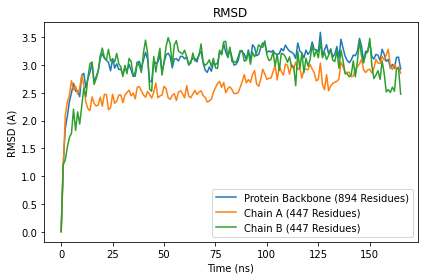

In [19]:
# Plot all-protein RMSD

chain_dict = {'Protein Backbone': 'protein and backbone',
                  'Chain A': 'protein and backbone and chainid 0',
                   'Chain B': 'protein and backbone and chainid 1'}

a.get_and_plot_rmsds_single_plot(traj,topo_dict=chain_dict,)

TM01 residue 30 to 56 and protein and 0 Chain A
TM01 residue 30 to 56 and protein and 1 Chain B
TM01-02_Loop residue 58 to 68 and protein and 0 Chain A
TM01-02_Loop residue 58 to 68 and protein and 1 Chain B
TM02 residue 69 to 94 and protein and 0 Chain A
TM02 residue 69 to 94 and protein and 1 Chain B
TM02-03_Loop residue 99 to 108 and protein and 0 Chain A
TM02-03_Loop residue 99 to 108 and protein and 1 Chain B
TM03 residue 109 to 132 and protein and 0 Chain A
TM03 residue 109 to 132 and protein and 1 Chain B
TM03-04_Loop residue 133 to 136 and protein and 0 Chain A
TM03-04_Loop residue 133 to 136 and protein and 1 Chain B
TM04 residue 137 to 162 and protein and 0 Chain A
TM04 residue 137 to 162 and protein and 1 Chain B
TM04-05_Loop residue 167 to 176 and protein and 0 Chain A
TM04-05_Loop residue 167 to 176 and protein and 1 Chain B
TM05 residue 185 to 204 and protein and 0 Chain A
TM05 residue 185 to 204 and protein and 1 Chain B
TM06 residue 206 to 225 and protein and 0 Chain A


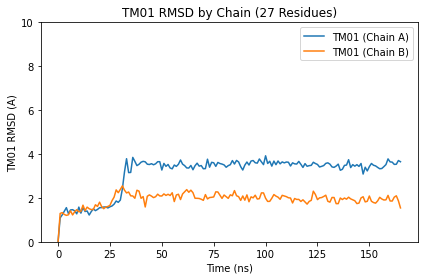

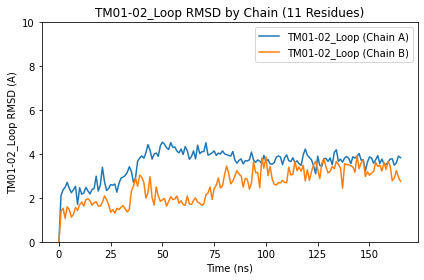

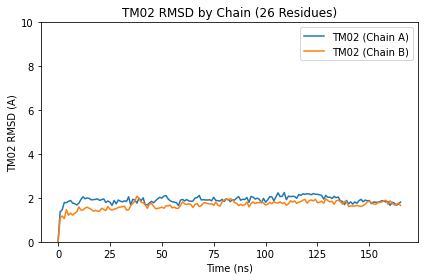

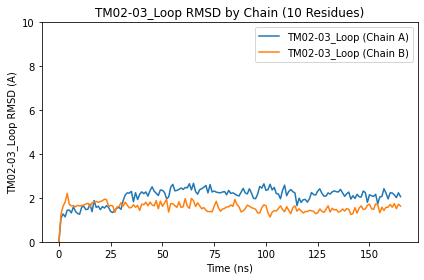

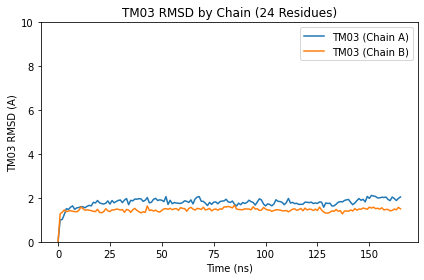

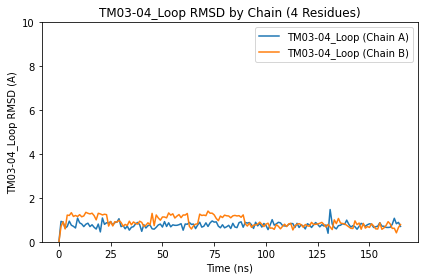

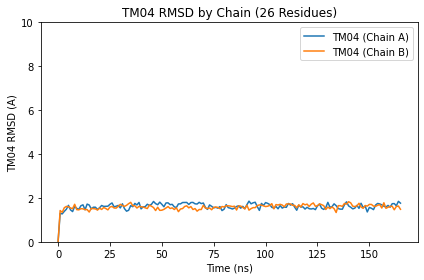

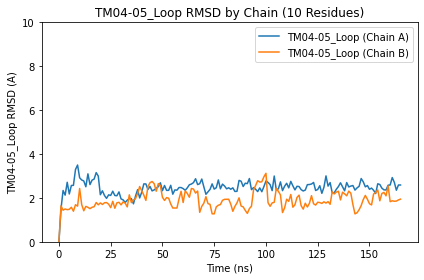

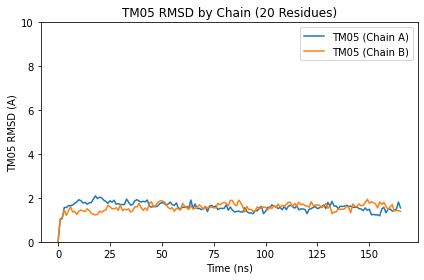

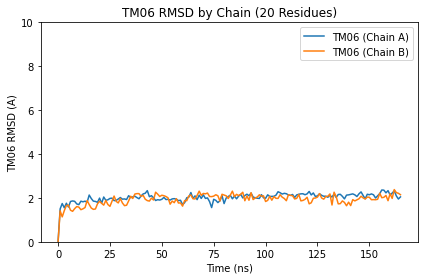

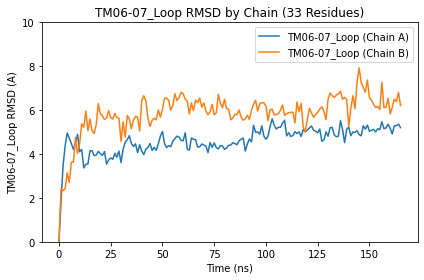

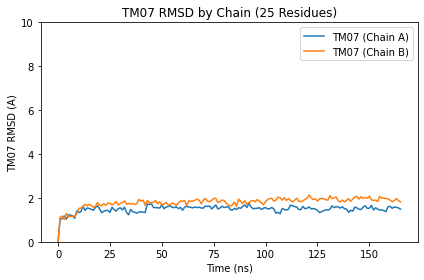

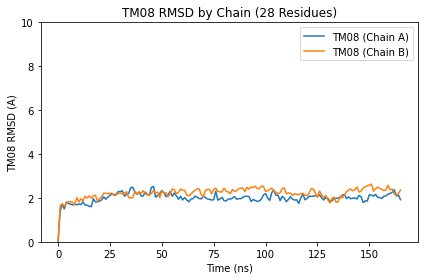

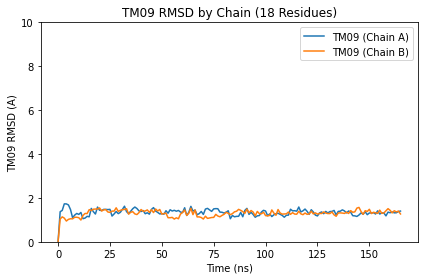

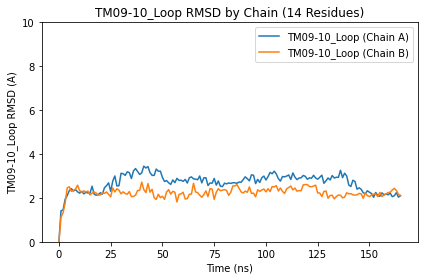

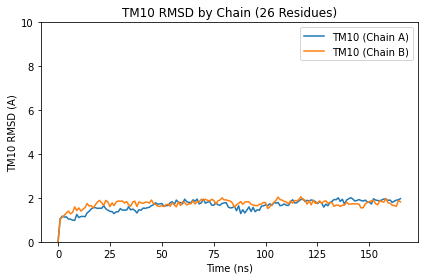

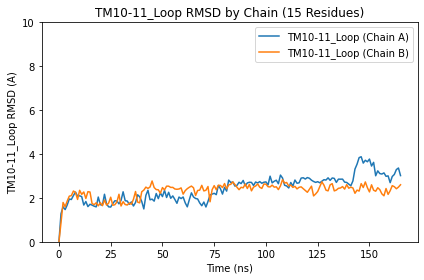

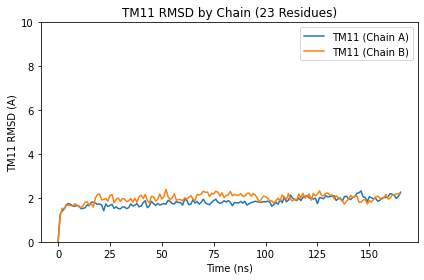

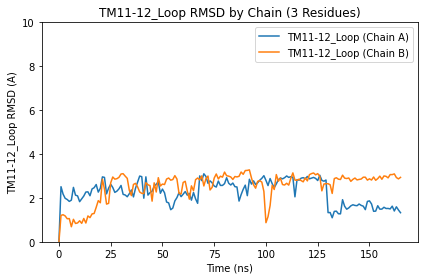

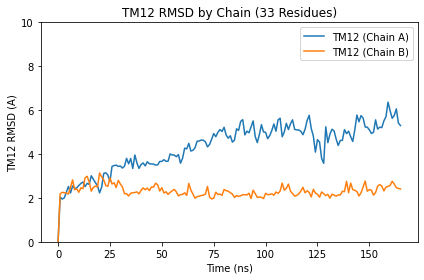

In [22]:
# Plot helix RMSD

label_yaml_path = "../../pymol-scripts/tmem175-RMSD-mdtraj-topology.yaml"
with open(label_yaml_path, 'r') as file: label_dict = yaml.safe_load(file)
a.get_and_plot_rmsds_by_chain(traj,
                            topo_dict=label_dict,
                             )

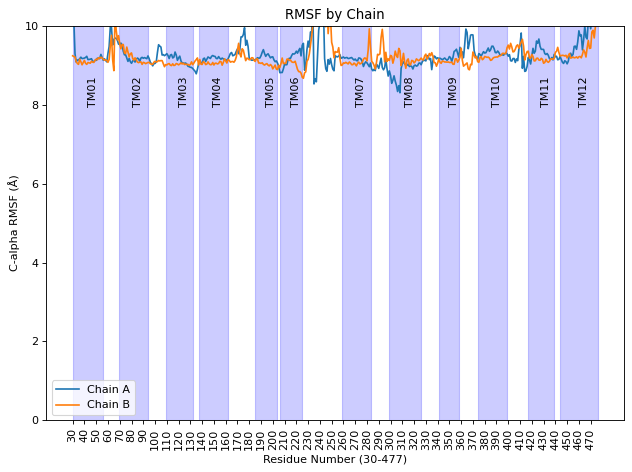

In [20]:
# Plot RMSF

a.get_and_plot_rmsf_by_chain(traj, label_yaml_path="../../pymol-scripts/tmem175-RMSD-true-indexed.yaml")

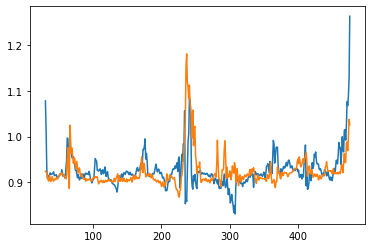

In [28]:
# Plot RMSF 
chain_dict = {'Chain A': 0, 'Chain B': 1}
chain_rmsf_dict = {}
for chain, chainid in chain_dict.items():
        idx = traj.topology.select(f'protein and chainid {chainid} and name CA')
        subset = traj.atom_slice(idx)

        rmsf = md.rmsf(target=traj,
                       reference=None,
                       frame=0,
                       atom_indices=idx)

        resids = [id for id in range(30, subset.n_residues + 30)]

        ##Save as angstroms
        chain_rmsf_dict[chain] = rmsf * 10

        plt.plot(resids, rmsf, label=chain)